In [4]:
import qiskit

In [5]:
qiskit.__version__

'1.3.1'

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", # ibm_cloud 
                               token = 'c03f67cb06e7a35f1ed3a511339feb145e8ba60ce8efa5e0436a3e57215a3a1c8d76be4cd28c7ebe90a74c5c64a32f72c8707ea172b26c50f6656218725407fe')

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(channel='ibm_quantum',
                                  token = 'c03f67cb06e7a35f1ed3a511339feb145e8ba60ce8efa5e0436a3e57215a3a1c8d76be4cd28c7ebe90a74c5c64a32f72c8707ea172b26c50f6656218725407fe',overwrite=True)

In [8]:
backend = service.backend(name = "ibm_brisbane")

In [9]:
backend.num_qubits

127

Step1:Map the problem to circuits and operators

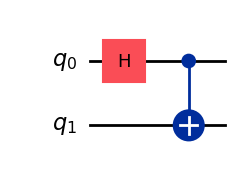

In [10]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [11]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

Step2:Optimise

Step3:Execute on the backend

In [12]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Estimator
from qiskit.quantum_info import Pauli

# Define a quantum circuit
qc = QuantumCircuit(2)  # 2-qubit circuit
qc.h(0)  # Apply a Hadamard gate to qubit 0
qc.cx(0, 1)  # Apply a CNOT gate from qubit 0 to qubit 1

# Define the observables (Pauli operators)
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

# Create an Estimator
estimator = Estimator()

# Run the estimator with the quantum circuit and observables
job = estimator.run([qc] * len(observables), observables)

# Get the results
result = job.result()
print("Expectation values:", result.values)


Expectation values: [ 1.          0.01367188  0.01367188  1.         -0.07617188 -0.07617188]


Step 4: Post-process (and plotting)

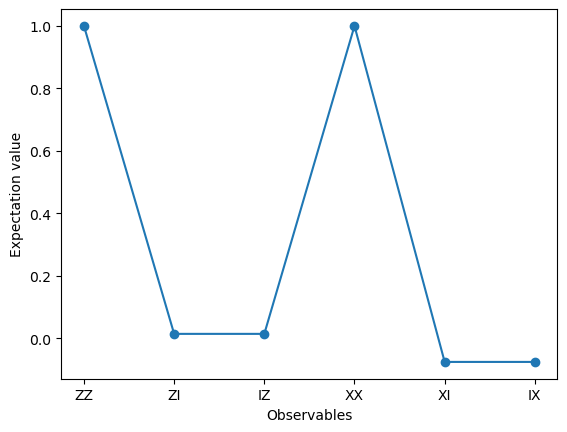

In [13]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

Extend the Hello World example to an n-qubit GHZ state:


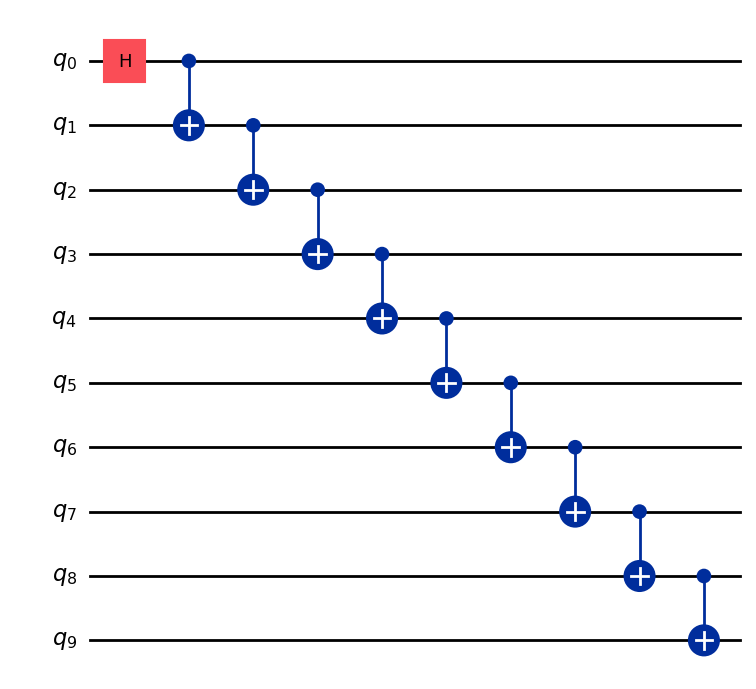

In [15]:
from qiskit import QuantumCircuit
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 10
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')
